# Image Segementation with Kmeans

## Applying Kmeans on a 256*256 greyscale image

### Introducing K-means



The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

    The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
    Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the k-means model. We will soon dive into exactly how the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the k-means result.

First, let's generate a two-dimensional dataset.

***

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

**Importing important libraries**

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import cv2
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**FIlepath to images**

In [ ]:
filepath ="/content/drive/MyDrive/PIM/ATVD05/imag4.jpg"

# Displaying Image:

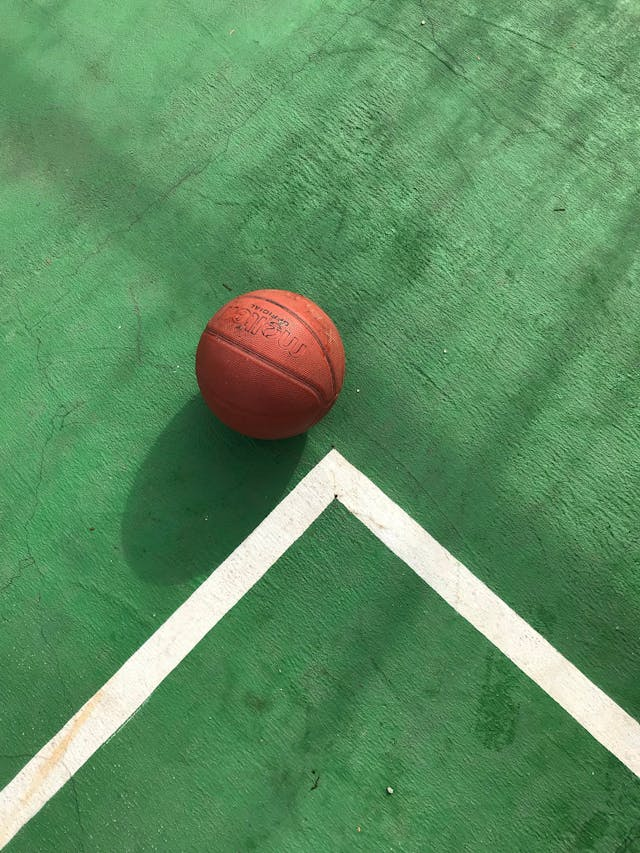

In [ ]:
Image(filepath)

## <u>Algorithm :</u>

Κ-means clustering algorithm inputs are the number of clusters Κ and the data set. Algorithm starts with initial estimates for the Κ centroids, which can either be randomly generated or randomly selected from the data set. The algorithm then iterates between two steps:

1. <u>Data assigment step:</u>

Each centroid defines one of the clusters. In this step, each data point based on the squared Euclidean distance is assigned to its nearest centroid. If 𝑐𝑖

is the collection of centroids in set C, then each data point x is assigned to a cluster based on
min𝑐𝑖∈𝐶𝑑𝑖𝑠𝑡(𝑐𝑖,𝑥)2

where dist( · ) is the standard (L2) Euclidean distance.

2. <u>Centroid update step:</u>

Centroids are recomputed by taking the mean of all data points assigned to that centroid's cluster.

The algorithm iterates between step one and two until a stopping criteria is met (no data points change clusters, the sum of the distances is minimized, or some maximum number of iterations is reached).

This algorithm may converge on a local optimum. Assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

### <u>Choosing K</u>

If the true label is not known in advance, then K-Means clustering can be evaluated using Elbow Criterion , Silhouette Coefficient , cross-validation, information criteria, the information theoretic jump method, and the G-means algorithm.
***

### The objective of K-Means clustering is to minimize the sum of squared distances between all points and the cluster center.

![](https://miro.medium.com/max/1104/1*riInbzp5CiuMOOq8rldQ7w.png)

***

**Converting 3D image numpy array to 2D **

our image array is converted in 2d so Kmeans can be performed anad its done with np.reshape.

In [ ]:
img = cv2.imread(filepath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()

Plotting graph

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

<Figure size 640x480 with 0 Axes>

The good news is that the k-means algorithm assigns the points to clusters very similarly to how we might assign them by eye. But you might wonder how this algorithm finds these clusters so quickly! After all, the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly. Fortunately for us, such an exhaustive search is not necessary: instead, the typical approach to k-means involves an intuitive iterative approach known as expectation–maximization.

**Reshaping np array in 2D to perform kmeans**

In [ ]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
print(vectorized.shape)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

(545920, 3)


**Keeping K value 3**

In [ ]:
K=3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
label = label.flatten()

**Reshaping 2D array to 3D array**

In [ ]:
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

**Plotting Resultant Image **

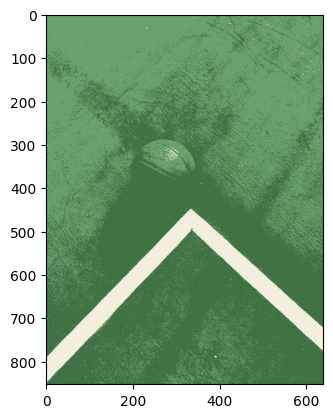

In [ ]:
plt.imshow(result_image)
plt.show()

***

**Comparing Original and Segmented image**

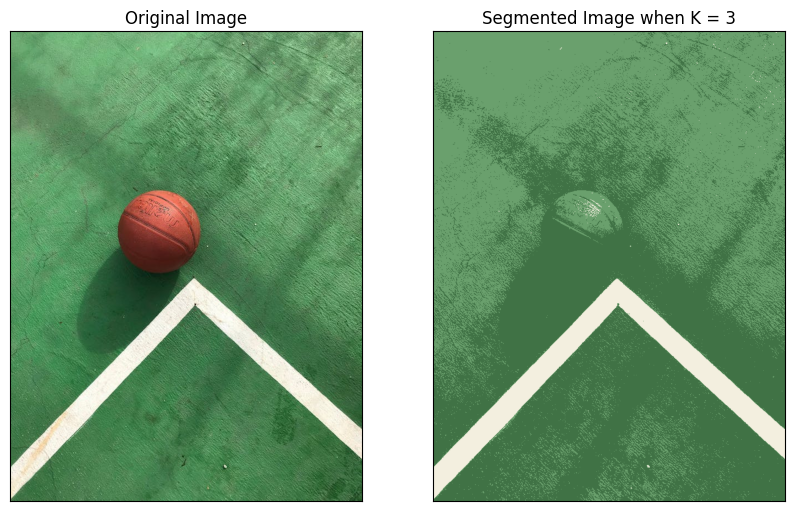

In [ ]:
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1, 2, 1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

***

**With K values as 4**

In [ ]:
K=4
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
label = label.flatten()
## Reshaping 2D array to 3D array
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

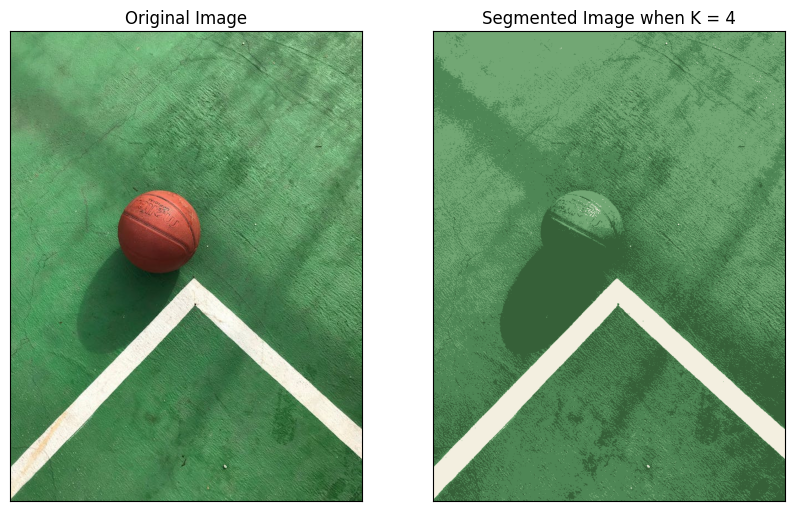

In [ ]:
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1, 2, 1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

***

**With K values as 5**

In [ ]:
K=5
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
label = label.flatten()

## Reshaping 2D array to 3D array

center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

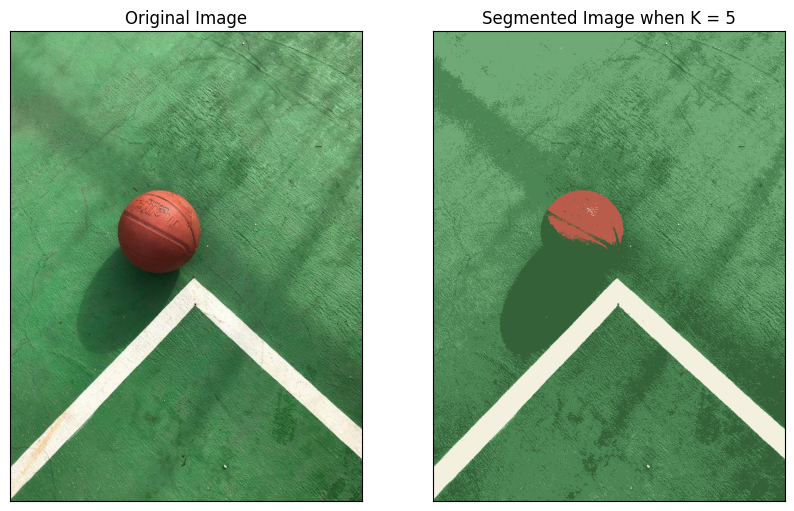

In [ ]:
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1, 2, 1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

***

**Identifying Edges in Image**

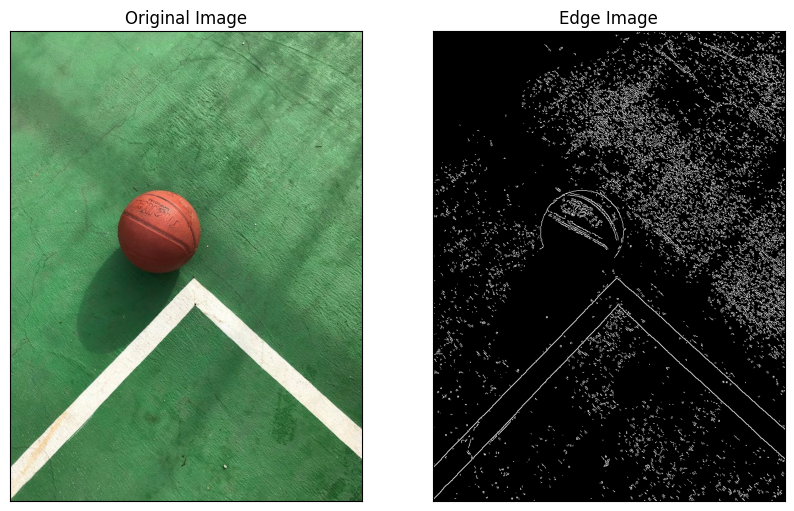

In [ ]:
edges = cv2.Canny(img,150,200)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

***

**Using kmeans function from sklearn.cluster**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


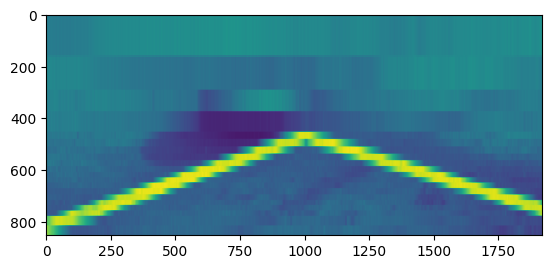

In [ ]:
pic = np.float64(img/256)
nsamples, nx, ny = pic.shape
pic1 = pic.reshape((nsamples,nx*ny))
kmeans = KMeans(n_clusters=20, random_state=0).fit(pic1)
pic2show = kmeans.cluster_centers_[kmeans.labels_]
plt.imshow(pic2show)

***

 ## Color to represent Cluster

This section will find the dominating Color from the segmented Image

In [ ]:
image = cv2.imread(filepath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.reshape((image.shape[0] * image.shape[1], 3))

In [ ]:
# cluster the pixel intensities
clt = KMeans(n_clusters = 5)
clt.fit(image)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

**Functions to grab dominating colors**

for K = 5

In [ ]:
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
	# return the histogram
	return hist

In [ ]:
def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX

	# return the bar chart
	return bar

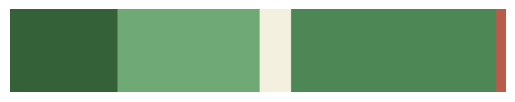

In [ ]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()